Multivariate Time series.

Essentially, when you have more information than just the single feature target column, and be dealing with this flavor known as known covariant.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/RestaurantVisitors.csv")
df.head()

,weekday,holiday,holiday_name,total,timestamp,item_id
0,Friday,1,New Year's Day,296.0,1/1/2016,Restaurant_Visitors
1,Saturday,0,na,191.0,1/2/2016,Restaurant_Visitors
2,Sunday,0,na,202.0,1/3/2016,Restaurant_Visitors
3,Monday,0,na,105.0,1/4/2016,Restaurant_Visitors
4,Tuesday,0,na,98.0,1/5/2016,Restaurant_Visitors


In [ ]:
# df['item_id'] = "ABCDEF....."

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weekday       517 non-null    object 
 1   holiday       517 non-null    int64  
 2   holiday_name  517 non-null    object 
 3   total         478 non-null    float64
 4   timestamp     517 non-null    object 
 5   item_id       517 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.4+ KB


In [6]:
df.iloc[:478]

,weekday,holiday,holiday_name,total,timestamp,item_id
0,Friday,1,New Year's Day,296.0,1/1/2016,Restaurant_Visitors
1,Saturday,0,na,191.0,1/2/2016,Restaurant_Visitors
2,Sunday,0,na,202.0,1/3/2016,Restaurant_Visitors
3,Monday,0,na,105.0,1/4/2016,Restaurant_Visitors
4,Tuesday,0,na,98.0,1/5/2016,Restaurant_Visitors
...,...,...,...,...,...,...
473,Tuesday,0,na,91.0,4/18/2017,Restaurant_Visitors
474,Wednesday,0,na,79.0,4/19/2017,Restaurant_Visitors
475,Thursday,0,na,90.0,4/20/2017,Restaurant_Visitors
476,Friday,0,na,165.0,4/21/2017,Restaurant_Visitors


In [5]:
df.iloc[478:]

,weekday,holiday,holiday_name,total,timestamp,item_id
478,Sunday,0,na,NaN,4/23/2017,Restaurant_Visitors
479,Monday,0,na,NaN,4/24/2017,Restaurant_Visitors
480,Tuesday,0,na,NaN,4/25/2017,Restaurant_Visitors
481,Wednesday,0,na,NaN,4/26/2017,Restaurant_Visitors
482,Thursday,0,na,NaN,4/27/2017,Restaurant_Visitors
483,Friday,0,na,NaN,4/28/2017,Restaurant_Visitors
484,Saturday,0,na,NaN,4/29/2017,Restaurant_Visitors
485,Sunday,0,na,NaN,4/30/2017,Restaurant_Visitors
486,Monday,0,na,NaN,5/1/2017,Restaurant_Visitors
487,Tuesday,0,na,NaN,5/2/2017,Restaurant_Visitors


In [7]:
datetimes = pd.to_datetime(df['timestamp'])
datetimes

0     2016-01-01
1     2016-01-02
2     2016-01-03
3     2016-01-04
4     2016-01-05
         ...    
512   2017-05-27
513   2017-05-28
514   2017-05-29
515   2017-05-30
516   2017-05-31
Name: timestamp, Length: 517, dtype: datetime64[ns]

In [8]:
datetimes.dt.day_of_week

0      4
1      5
2      6
3      0
4      1
      ..
512    5
513    6
514    0
515    1
516    2
Name: timestamp, Length: 517, dtype: int64

In [9]:
df['dow'] = datetimes.dt.day_of_week
df

,weekday,holiday,holiday_name,total,timestamp,item_id,dow
0,Friday,1,New Year's Day,296.0,1/1/2016,Restaurant_Visitors,4
1,Saturday,0,na,191.0,1/2/2016,Restaurant_Visitors,5
2,Sunday,0,na,202.0,1/3/2016,Restaurant_Visitors,6
3,Monday,0,na,105.0,1/4/2016,Restaurant_Visitors,0
4,Tuesday,0,na,98.0,1/5/2016,Restaurant_Visitors,1
...,...,...,...,...,...,...,...
512,Saturday,0,na,NaN,5/27/2017,Restaurant_Visitors,5
513,Sunday,0,na,NaN,5/28/2017,Restaurant_Visitors,6
514,Monday,1,Memorial Day,NaN,5/29/2017,Restaurant_Visitors,0
515,Tuesday,0,na,NaN,5/30/2017,Restaurant_Visitors,1


In [10]:
df = df.drop(["weekday","holiday_name"], axis=1)
df

,holiday,total,timestamp,item_id,dow
0,1,296.0,1/1/2016,Restaurant_Visitors,4
1,0,191.0,1/2/2016,Restaurant_Visitors,5
2,0,202.0,1/3/2016,Restaurant_Visitors,6
3,0,105.0,1/4/2016,Restaurant_Visitors,0
4,0,98.0,1/5/2016,Restaurant_Visitors,1
...,...,...,...,...,...
512,0,NaN,5/27/2017,Restaurant_Visitors,5
513,0,NaN,5/28/2017,Restaurant_Visitors,6
514,1,NaN,5/29/2017,Restaurant_Visitors,0
515,0,NaN,5/30/2017,Restaurant_Visitors,1


In [11]:
df.tail()

,holiday,total,timestamp,item_id,dow
512,0,NaN,5/27/2017,Restaurant_Visitors,5
513,0,NaN,5/28/2017,Restaurant_Visitors,6
514,1,NaN,5/29/2017,Restaurant_Visitors,0
515,0,NaN,5/30/2017,Restaurant_Visitors,1
516,0,NaN,5/31/2017,Restaurant_Visitors,2


In [12]:
# setup past covariance
# Historical KNOWN data with KNOWN COVARIANTS
df.iloc[:478].to_csv("known_covariance_past.csv", index=False)

In [14]:
# setup future covariance
df.iloc[478:].drop("total",axis=1).to_csv("known_covariance_future.csv", index=False)

In [15]:
len(df.iloc[478:])

39

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   holiday    517 non-null    int64  
 1   total      478 non-null    float64
 2   timestamp  517 non-null    object 
 3   item_id    517 non-null    object 
 4   dow        517 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 20.3+ KB


In [17]:
517-478

39

In [18]:
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [19]:
train_data = TimeSeriesDataFrame("known_covariance_past.csv")
train_data  # known as MULTI-VARIATE time series ... as we have more variable than we are trying to predict

holiday  total  dow
item_id             timestamp                      
Restaurant_Visitors 2016-01-01        1  296.0    4
                    2016-01-02        0  191.0    5
                    2016-01-03        0  202.0    6
                    2016-01-04        0  105.0    0
                    2016-01-05        0   98.0    1
...                                 ...    ...  ...
                    2017-04-18        0   91.0    1
                    2017-04-19        0   79.0    2
                    2017-04-20        0   90.0    3
                    2017-04-21        0  165.0    4
                    2017-04-22        0  226.0    5

[478 rows x 3 columns]

In [20]:
predictor = TimeSeriesPredictor(prediction_length=39,
                                target="total",
                                known_covariates_names=["holiday", "dow"])

In [21]:
predictor.fit(train_data)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': None,
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'default',
 'prediction_length': 39,
 'random_seed': None,
 'target': 'total',
 'time_limit': None}
Provided training data set with 478 rows, 1 items (item = single time series). Average time series length is 478.0.
Training artifacts will be saved to: C:\Users\manor\Downloads\Automated Machine Learning with AutoGluon Library in Python\02_TimeSeries_Forecasting\AutogluonModels\ag-20230418_033512
AutoGluon will save models to AutogluonModels\ag-20230418_033512\
AutoGluon will gauge predictive performance using evaluation metric: 'mean_wQuantileLoss'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'total'
	known

In [22]:
predictor.fit_summary()

****************** Summary of fit() ******************
Estimated performance of each model:
              model  score_val  pred_time_val  fit_time_marginal  fit_order
0  WeightedEnsemble  -0.135834       7.080463           1.907132          9
1               ETS  -0.140844       6.583469           0.001004          3
2           AutoETS  -0.141028      23.792852           0.000990          6
3            DeepAR  -0.179173       0.196522         838.585245          8
4     SeasonalNaive  -0.231982       5.775180           0.002998          2
5             ARIMA  -0.272109       0.300472           0.000998          5
6  AutoGluonTabular  -0.285682       0.080299           5.072116          7
7             Theta  -0.597353       6.330618           0.003005          4
8             Naive  -0.597514       7.551689           0.001999          1
Number of models trained: 9
Types of models trained:
{'NaiveModel', 'ThetaModel', 'AutoGluonTabularModel', 'SeasonalNaiveModel', 'ETSModel', 'ARIMAM

{'model_types': {'Naive': 'NaiveModel',
  'SeasonalNaive': 'SeasonalNaiveModel',
  'ETS': 'ETSModel',
  'Theta': 'ThetaModel',
  'ARIMA': 'ARIMAModel',
  'AutoETS': 'AutoETSModel',
  'AutoGluonTabular': 'AutoGluonTabularModel',
  'DeepAR': 'DeepARModel',
  'WeightedEnsemble': 'TimeSeriesGreedyEnsemble'},
 'model_performance': {'Naive': -0.5975142450840499,
  'SeasonalNaive': -0.23198222733380813,
  'ETS': -0.14084408646238938,
  'Theta': -0.5973530258246511,
  'ARIMA': -0.2721086954130272,
  'AutoETS': -0.14102756409903838,
  'AutoGluonTabular': -0.2856819668770391,
  'DeepAR': -0.17917348709540143,
  'WeightedEnsemble': -0.13583356269711971},
 'model_best': 'WeightedEnsemble',
 'model_paths': {'Naive': 'AutogluonModels\\ag-20230418_033512\\models\\Naive\\',
  'SeasonalNaive': 'AutogluonModels\\ag-20230418_033512\\models\\SeasonalNaive\\',
  'ETS': 'AutogluonModels\\ag-20230418_033512\\models\\ETS\\',
  'Theta': 'AutogluonModels\\ag-20230418_033512\\models\\Theta\\',
  'ARIMA': 'Autogl

In [23]:
future_events = TimeSeriesDataFrame("known_covariance_future.csv")
future_events

Loaded data from: known_covariance_future.csv | Columns = 4 / 4 | Rows = 39 -> 39


holiday  dow
item_id             timestamp               
Restaurant_Visitors 2017-04-23        0    6
                    2017-04-24        0    0
                    2017-04-25        0    1
                    2017-04-26        0    2
                    2017-04-27        0    3
                    2017-04-28        0    4
                    2017-04-29        0    5
                    2017-04-30        0    6
                    2017-05-01        0    0
                    2017-05-02        0    1
                    2017-05-03        0    2
                    2017-05-04        0    3
                    2017-05-05        1    4
                    2017-05-06        0    5
                    2017-05-07        0    6
                    2017-05-08        0    0
                    2017-05-09        0    1
                    2017-05-10        0    2
                    2017-05-11        0    3
                    2017-05-12        0    4
                    2017-05-13        0    5
                    2017-05-14        1    6
                    2017-05-15        0    0
                    2017-05-16        0    1
                    2017-05-17        0    2
                    2017-05-18        0    3
                    2017-05-19        0    4
                    2017-05-20        0    5
                    2017-05-21        0    6
                    2017-05-22        0    0
                    2017-05-23        0    1
                    2017-05-24        0    2
                    2017-05-25        0    3
                    2017-05-26        0    4
                    2017-05-27        0    5
                    2017-05-28        0    6
                    2017-05-29        1    0
                    2017-05-30        0    1
                    2017-05-31        0    2

In [24]:
predictions = predictor.predict(train_data, 
                                known_covariates=future_events)

Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


In [25]:
predictions

mean         0.1         0.2  \
item_id             timestamp                                        
Restaurant_Visitors 2017-04-23  180.161664  146.649833  158.559604   
                    2017-04-24   95.228529   62.529135   73.763059   
                    2017-04-25   97.361090   64.918588   76.054440   
                    2017-04-26   98.154789   65.398950   76.653746   
                    2017-04-27  102.422056   69.454055   80.773939   
                    2017-04-28  145.430999  111.228952  123.248953   
                    2017-04-29  225.508587  190.989683  202.904770   
                    2017-04-30  174.645138  140.828054  152.454542   
                    2017-05-01   90.415550   57.241565   68.724104   
                    2017-05-02   90.063175   57.082783   68.462929   
                    2017-05-03   99.659049   66.047102   77.729090   
                    2017-05-04  105.747141   72.115759   83.635132   
                    2017-05-05  163.393871  128.011656  140.460044   
                    2017-05-06  223.868874  188.771661  201.015768   
                    2017-05-07  174.628595  139.682214  151.868462   
                    2017-05-08   87.684504   53.784956   65.468163   
                    2017-05-09   89.738806   55.808618   67.648099   
                    2017-05-10  110.271534   74.877837   87.466558   
                    2017-05-11  107.225766   70.771894   83.524069   
                    2017-05-12  152.209826  113.545870  126.927482   
                    2017-05-13  228.692244  190.438559  203.901208   
                    2017-05-14  196.557884  159.873353  172.567139   
                    2017-05-15   89.027645   52.931045   65.414232   
                    2017-05-16   95.914638   59.843565   72.461370   
                    2017-05-17  107.049637   69.391545   82.275709   
                    2017-05-18  101.479399   63.217736   77.248860   
                    2017-05-19  143.222679  105.942685  118.997489   
                    2017-05-20  231.622627  194.372790  207.431805   
                    2017-05-21  177.123613  140.793587  153.115851   
                    2017-05-22   86.819637   51.376292   63.575874   
                    2017-05-23   95.551315   59.685282   72.097119   
                    2017-05-24  107.374925   70.623253   83.229178   
                    2017-05-25  107.519809   69.606908   82.722020   
                    2017-05-26  152.722062  114.190787  127.461147   
                    2017-05-27  233.586029  195.344939  208.615539   
                    2017-05-28  175.304655  137.078982  150.317677   
                    2017-05-29  109.556383   71.334910   84.708443   
                    2017-05-30  109.250638   68.944392   83.407723   
                    2017-05-31  105.011305   61.954791   78.373051   

                                       0.3         0.4         0.5  \
item_id             timestamp                                        
Restaurant_Visitors 2017-04-23  166.881628  173.861366  180.293622   
                    2017-04-24   81.902716   88.786195   95.181619   
                    2017-04-25   84.148115   90.972785   97.351601   
                    2017-04-26   84.741753   91.683832   98.113411   
                    2017-04-27   88.945848   95.897655  102.358549   
                    2017-04-28  131.711042  138.828719  145.410991   
                    2017-04-29  211.622309  218.779438  225.383572   
                    2017-04-30  160.772765  167.878482  174.537632   
                    2017-05-01   76.899482   83.909290   90.450358   
                    2017-05-02   76.582478   83.527179   90.026935   
                    2017-05-03   86.040411   93.142851   99.706970   
                    2017-05-04   92.011176   99.119658  105.830311   
                    2017-05-05  149.137217  156.551857  163.456687   
                    2017-05-06  209.587031  216.999598  223.944679   
                    2017-05-07  160.557314  167

In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_predictions(train_data, predictions, item_id, target_col):
    plt.figure(figsize=(20,3), dpi=150)

    # Y Predictions
    y_pred = predictions.loc[item_id]

    # Historical Y values
    y_past = train_data.loc[item_id][target_col]

    # Plot historical values against Best Model's Predictions
    plt.plot(y_past, label="Known Past Historical Values")
    plt.plot(y_pred['mean'], label="Mean Forecast")

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label="10-90% Confidence Level"
    )

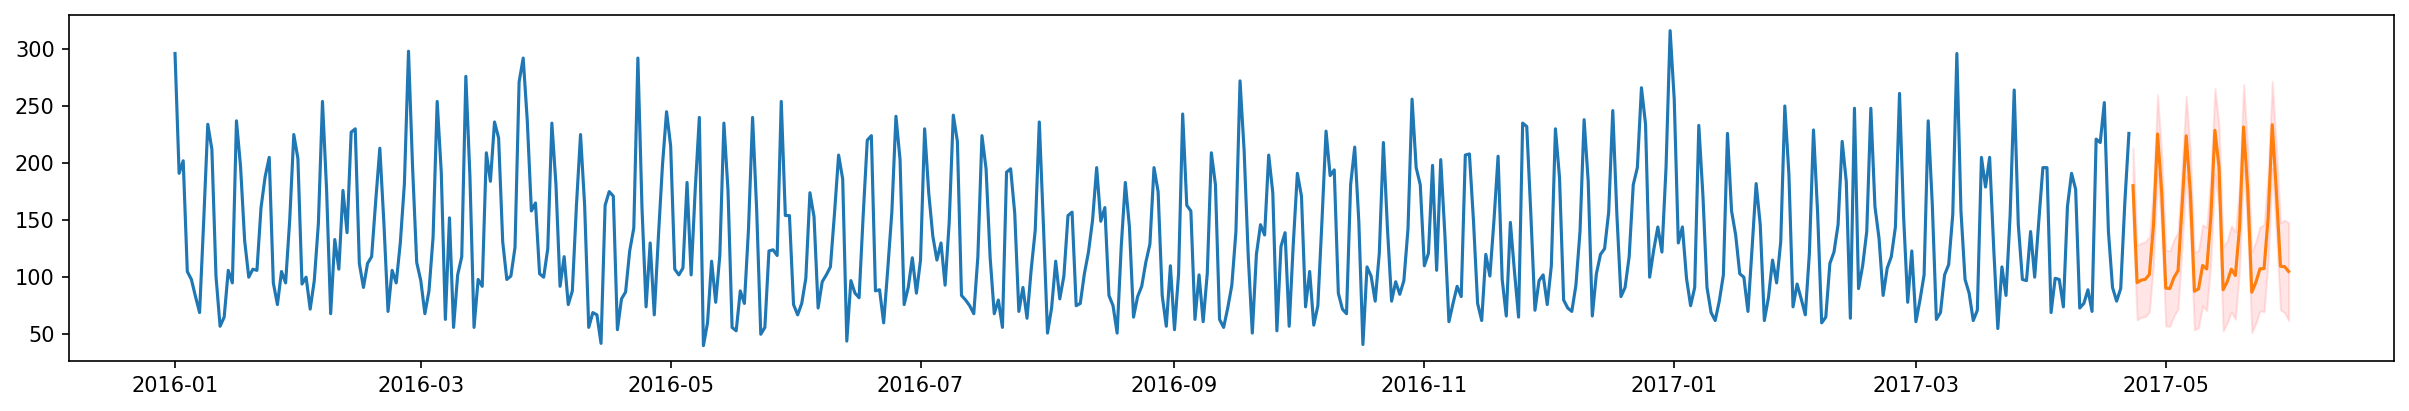

In [28]:
plot_predictions(train_data=train_data,
                 predictions=predictions,
                 item_id="Restaurant_Visitors",
                 target_col="total")